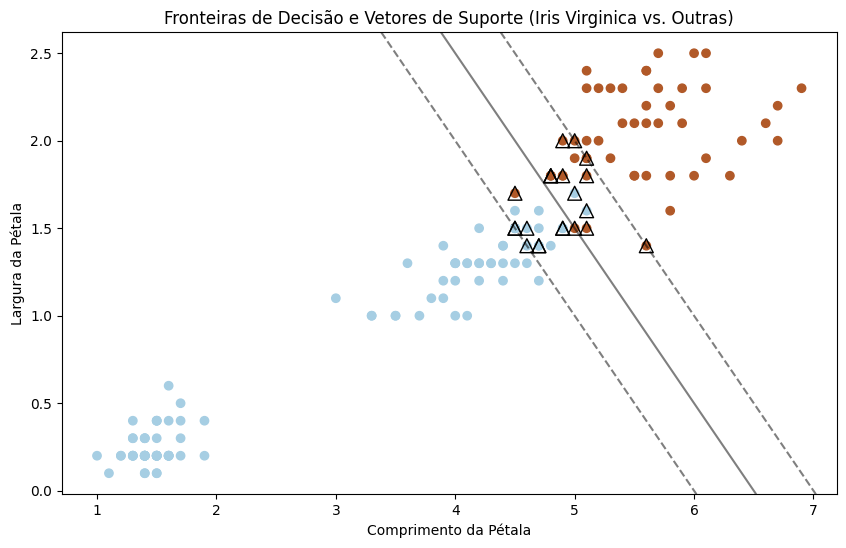

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split

# Carregue o conjunto de dados Iris
iris = datasets.load_iris()
X = iris.data[:, 2:]  # Usaremos as duas últimas características (comprimento e largura da pétala)
y = iris.target

# Crie um rótulo binário para identificar Iris Virginica das demais
y_binary = np.where(y == 2, 1, 0)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

# Crie um classificador SVM linear
clf = svm.SVC(kernel='linear')

# Treine o classificador SVM no conjunto de treinamento
clf.fit(X_train, y_train)

# Faça previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Visualize as fronteiras de decisão
plt.figure(figsize=(10, 6))

# Plote os pontos de dados
plt.scatter(X[:, 0], X[:, 1], c=y_binary, cmap=plt.cm.Paired, marker='o')

# Plote as vetores de suporte
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='^')

# Crie um grid para plotar as fronteiras de decisão
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plote as fronteiras de decisão
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Defina rótulos e títulos
plt.xlabel('Comprimento da Pétala')
plt.ylabel('Largura da Pétala')
plt.title('Fronteiras de Decisão e Vetores de Suporte (Iris Virginica vs. Outras)')

plt.show()